# Titanic Disaster Problem

## Importing Libraries

In [1]:
#Data manipulation
import pandas as pd
import numpy as np
import random as rnd

#visualization of  the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading and Cursory analysis

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
combine = [train, test]

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Description of columns which are objects
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Missing values Analysis

In [9]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total*100/len(df),2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [10]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [11]:
#treating Embarked column in train dataset as it has only 2 missing values
total = train.value_counts("Embarked", dropna = False).sort_values(ascending = False)
percent = round(total*100/len(train),2)
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [12]:
#Looking at rows where Embarked is missing
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


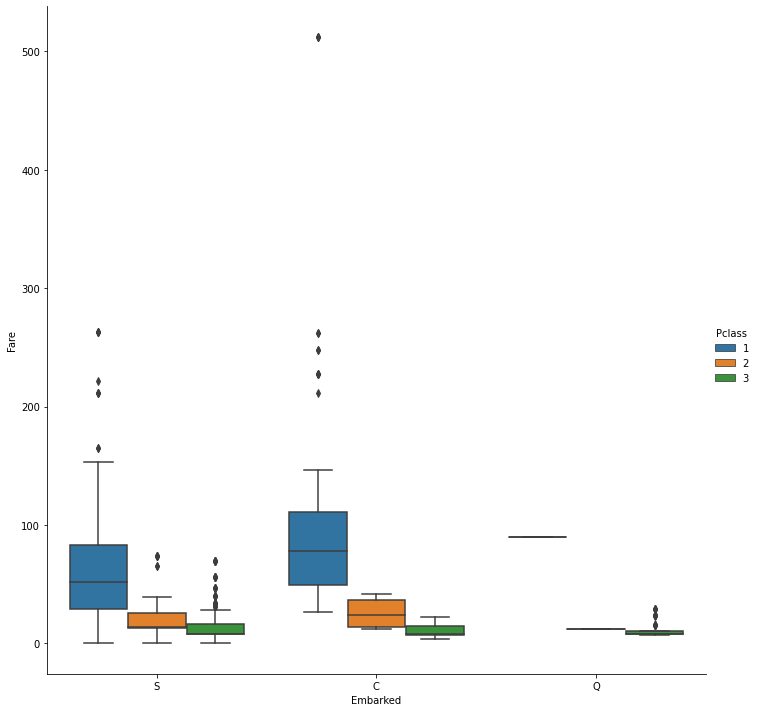

In [13]:
#visualizing distribution of fare across Pclass and Embarked 
sns.catplot(train, x = "Embarked", y= "Fare", hue="Pclass", kind = "box", height=10, aspect=1)

In [14]:
#filling missing Embarked values
train.Embarked.fillna("C", inplace=True)

## Feature Engineering Cabin Column

In [15]:
## Concat train and test into a dataframe "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=True)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [16]:
#Looking at the first character of all cabin types
all_data.Cabin = [i[0] for i in all_data.Cabin]
total = all_data.value_counts("Cabin", dropna = False).sort_values(ascending = False)
percent = round(total*100/len(all_data),2)
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
Cabin,,
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [17]:
#Average fare vlaues as per the cain types
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [18]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [19]:
with_N = all_data.loc[all_data.Cabin == "N", :].copy()
without_N = all_data.loc[all_data.Cabin != "N", :].copy()

In [20]:
##applying cabin estimator function. 
with_N.loc[:, 'Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data.loc[:890, :].copy()

test = all_data.loc[891:, :].copy()

# adding saved target variable with train. 
train.loc[:, 'Survived'] = survivers

In [21]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


In [22]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [23]:
#treating one missing fare value in test dataset
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
test.Fare.fillna(missing_value, inplace=True)

## Visualization

In [24]:
print(train.Age.isnull().sum()*100/len(train))
print(test.Age.isnull().sum()*100/len(test))

19.865319865319865
20.574162679425836


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


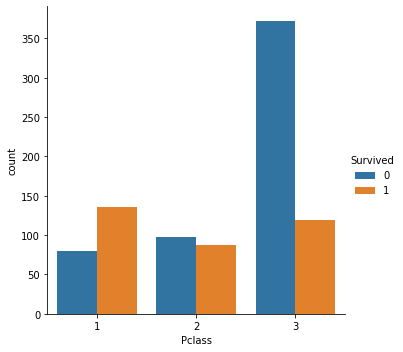

In [25]:
#Visualizing Pclass and Survived
sns.catplot(train, x = "Pclass", kind = "count", hue = "Survived")
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


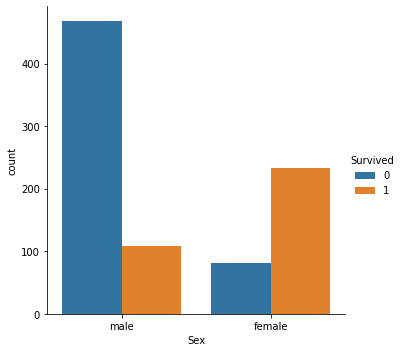

In [26]:
#Visualizing Sex and Survived
sns.catplot(train, x = "Sex", kind = "count", hue = "Survived")
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


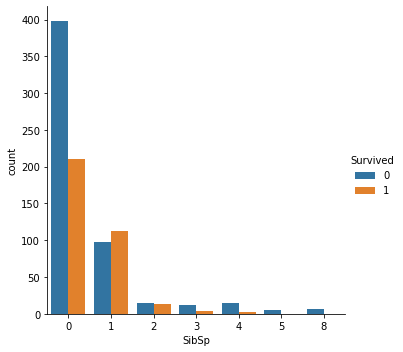

In [27]:
#Visualizing Sibsp and Survived
sns.catplot(train, x = "SibSp", kind = "count", hue = "Survived")
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


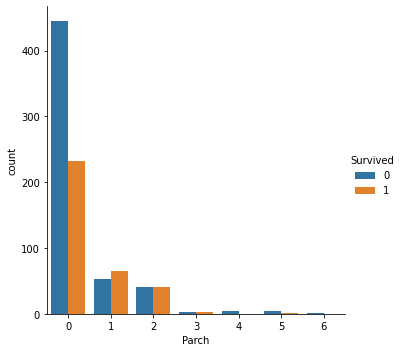

In [28]:
#Visualizing Parch and Survivedb
sns.catplot(train, x = "Parch", kind = "count", hue = "Survived")
train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean()

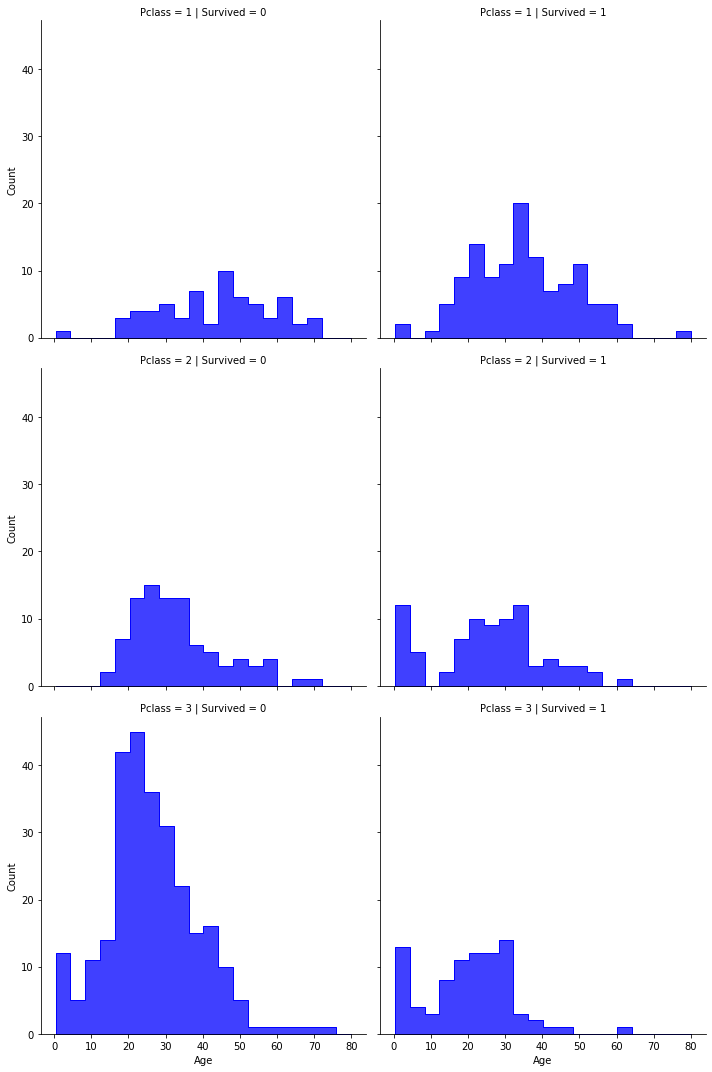

In [29]:
#visualizing Pclass, Survived and Age distribution
sns.displot(train, x = "Age", row = "Pclass", col='Survived', color = "b", element = "step")

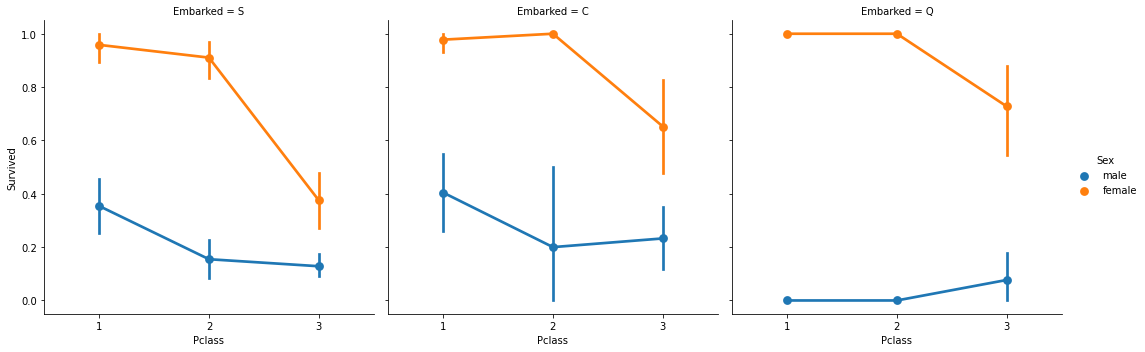

In [30]:
#Visualizing Pclass, Embarked, Sex and Survival together
sns.catplot(train, x="Pclass", y="Survived", kind = "point",  col = "Embarked", hue = "Sex" )

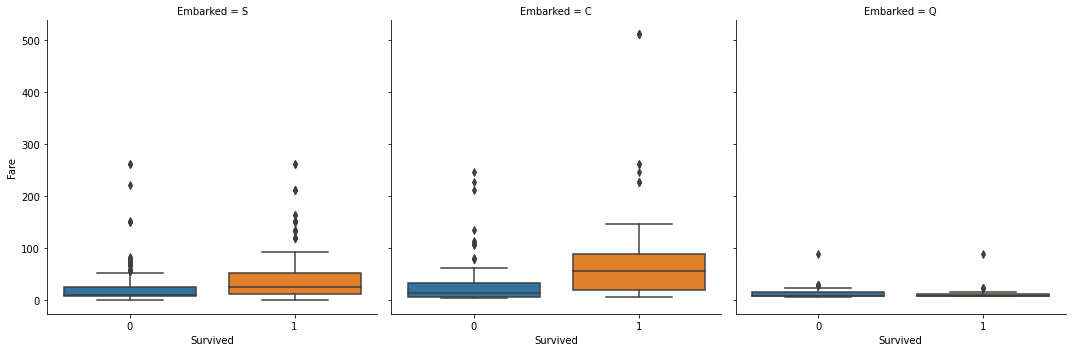

In [31]:
#Visualzing Emabarked, Fare and Survivial
sns.catplot(train, x = "Survived", y = "Fare", col = "Embarked", kind = "box")

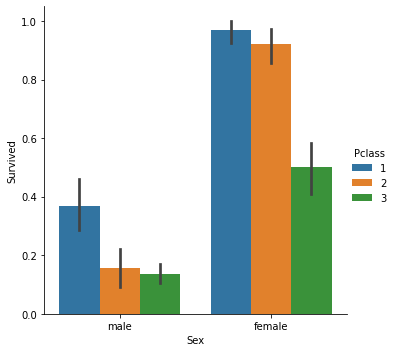

In [32]:
#Visualizing Survival rate, sex and Pclass
sns.catplot(train, x = "Sex", y = "Survived", kind = "bar", hue = "Pclass")

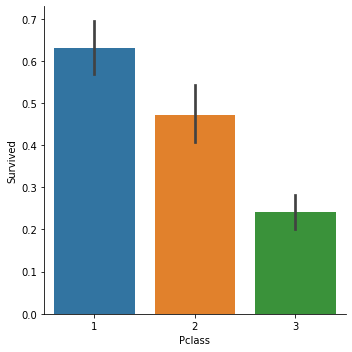

In [33]:
#Visualizing Pclass and Survived
sns.catplot(train, x = "Pclass", y = "Survived", kind = "bar")

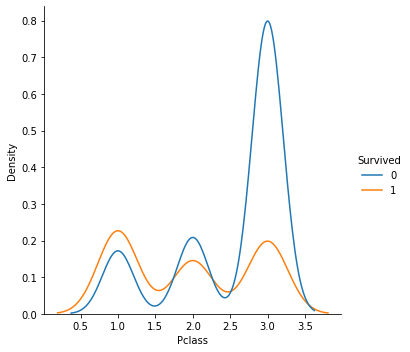

In [34]:
#Visualizing Pclass and Survived
sns.displot(train, x = "Pclass", hue = "Survived", kind = "kde")

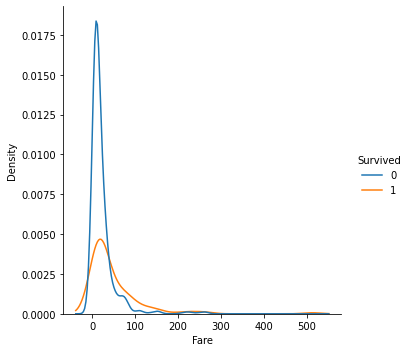

In [35]:
#visualzing Fare and survival rate
sns.displot(train, x = "Fare", kind = "kde", hue = "Survived", common_grid=True)

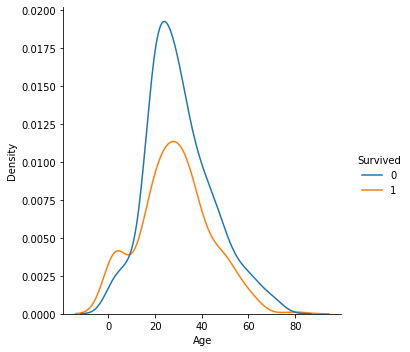

In [36]:
#Visualizing Age distribution
sns.displot(train, x = "Age", kind = "kde", hue = "Survived")

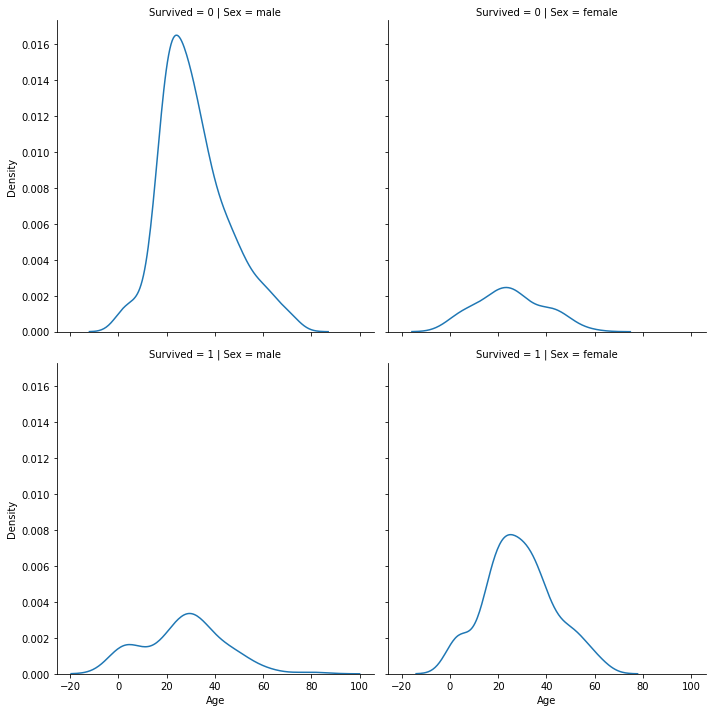

In [37]:
#Visualizing Survival, sex and age
sns.displot(train, x = "Age", kind = "kde", row = "Survived", col = "Sex")

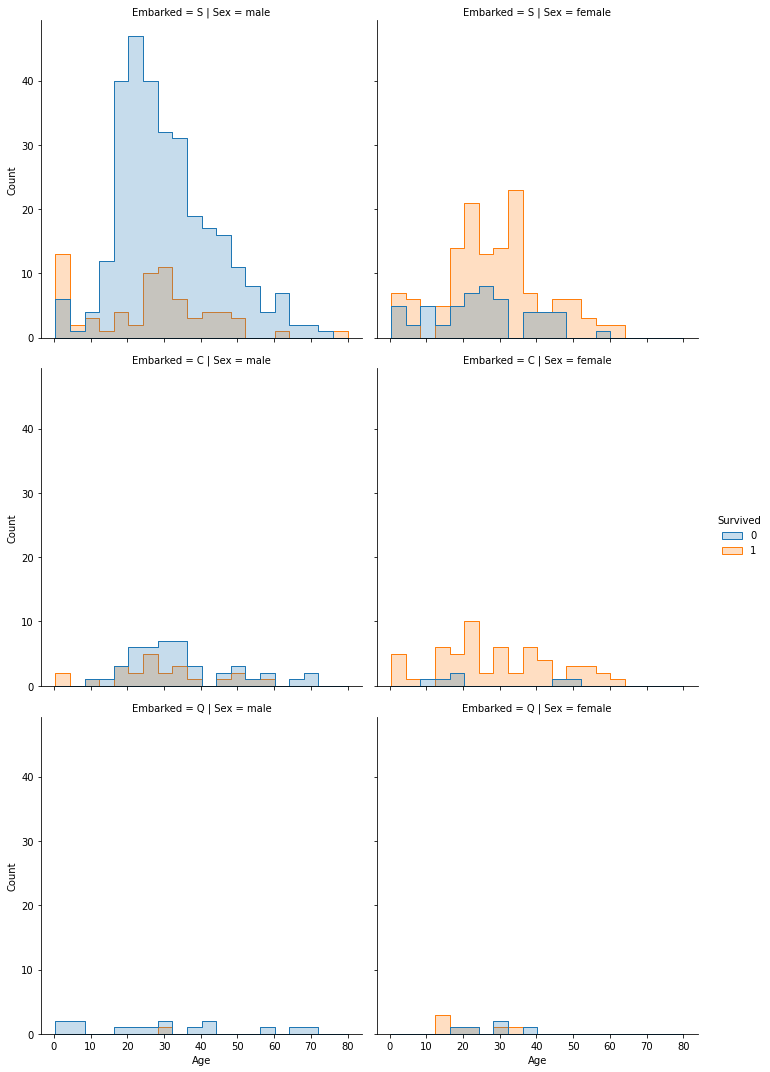

In [38]:
#visualizing Embarked, sex and survival
sns.displot(train, x = "Age", kind = "hist", hue = "Survived", row = "Embarked", col = "Sex", element = "step")

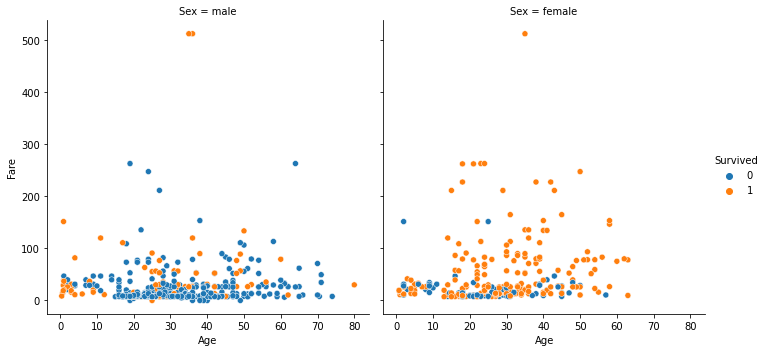

In [39]:
#Visualzing fare, sex and age
sns.relplot(train, x = "Age", y = "Fare", col = "Sex", hue = "Survived")

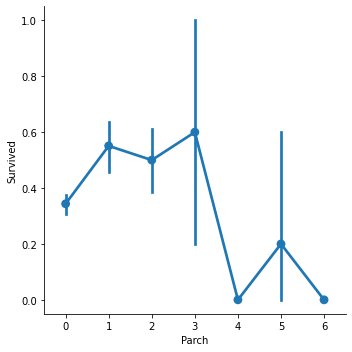

In [40]:
#visualzizing Parch and Survival
sns.catplot(train, x = "Parch", kind = "point", y = "Survived")

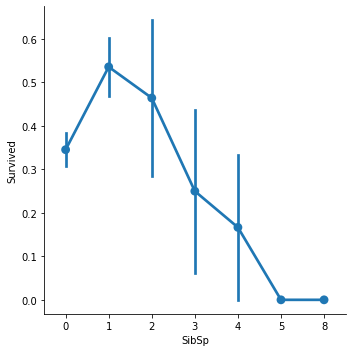

In [41]:
#Visualizing SibSp and Survival
sns.catplot(train, x = "SibSp", kind = "point", y = "Survived")

## Feature Engineering

In [42]:
#Feature engineering of Sex variable
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [43]:
#Correlation values between variable
pd.DataFrame((train.corr()**2).Survived.sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.295231
Pclass,0.114569
Fare,0.066207
Parch,0.006663
Age,0.005963
SibSp,0.001248
PassengerId,0.000025


<AxesSubplot: >

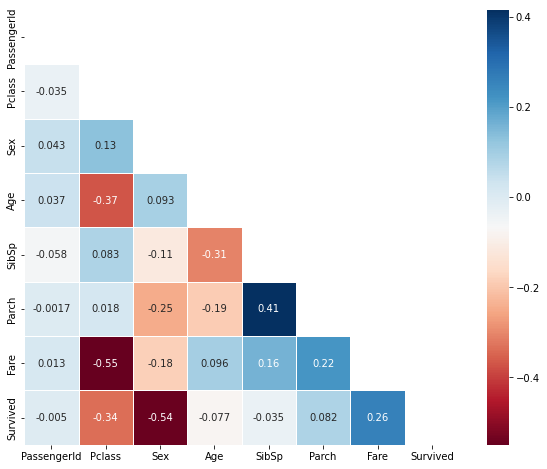

In [44]:
#Heatmap of correlation values
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(train.corr(), cmap = 'RdBu', annot=True, fmt='.2g', square = True, linewidths=.9, 
            linecolor='white', mask = mask)

In [45]:
#Creating a new variable family size based on Parch and SibSp
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [46]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [47]:
## apply the family_group function in family_size
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

In [48]:
#Creating a new variable based on familt
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

In [49]:
#dropping ticket variable as it doesn't seem to have any relevant information
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

In [50]:
#dropping Passenger Id variable as it is unique to each passenger
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [51]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

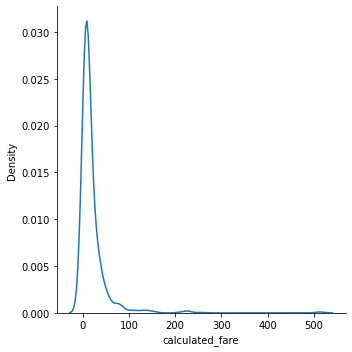

In [52]:
#visualizing 
sns.displot(train['calculated_fare'], kind = "kde")

In [53]:
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

In [54]:
#creating new feature based on range of fare
train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

In [55]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,family_size,family_group,is_alone,calculated_fare,fare_group
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,G,S,0,2,small,0,3.62500,Very_low
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C,1,2,small,0,35.64165,high
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,G,S,1,1,loner,1,7.92500,low
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S,1,2,small,0,26.55000,high
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,G,S,0,1,loner,1,8.05000,low


In [56]:
#creating new feature based on name title
combine[0] = train
combine[1] = test
for i, df in enumerate(combine):
    combine[i]['Title'] = combine[i].Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [57]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [58]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,family_size,family_group,is_alone,calculated_fare,fare_group,Title
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,G,S,0,2,small,0,3.62500,Very_low,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C,1,2,small,0,35.64165,high,Mrs
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,G,S,1,1,loner,1,7.92500,low,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S,1,2,small,0,26.55000,high,Mrs
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,G,S,0,1,loner,1,8.05000,low,Mr


In [59]:
#Creating dummy variable for categoircal variables
train = pd.get_dummies(train, columns=['Title',"Pclass", 'Cabin','Embarked', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['Title',"Pclass", 'Cabin','Embarked', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare"], axis=1, inplace=True)

In [60]:
train

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_Q,Embarked_S,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,1,22.0,1,0,0,0,3.62500,0,0,1,...,0,1,0,0,1,1,0,0,0,0
1,0,38.0,1,0,1,0,35.64165,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,26.0,0,0,1,1,7.92500,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,0,35.0,1,0,1,0,26.55000,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,1,35.0,0,0,0,1,8.05000,0,0,1,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,0,1,13.00000,0,0,0,...,0,1,0,1,0,0,0,0,1,0
887,0,19.0,0,0,1,1,30.00000,0,1,0,...,0,1,0,1,0,0,1,0,0,0
888,0,NaN,1,2,0,0,5.86250,0,1,0,...,0,1,0,0,1,0,0,1,0,0
889,1,26.0,0,0,1,1,30.00000,0,0,1,...,0,0,0,1,0,0,1,0,0,0


## Filling missing age values using a model

In [61]:
# rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [62]:
train

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_Q,Embarked_S,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,22.0,1,1,0,0,3.62500,0,0,1,...,0,1,0,0,1,1,0,0,0,0
1,1,38.0,0,1,0,0,35.64165,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,26.0,0,0,0,1,7.92500,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,1,35.0,0,1,0,0,26.55000,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,35.0,1,0,0,1,8.05000,0,0,1,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,0,0,1,13.00000,0,0,0,...,0,1,0,1,0,0,0,0,1,0
887,1,19.0,0,0,0,1,30.00000,0,1,0,...,0,1,0,1,0,0,1,0,0,0
888,0,NaN,0,1,2,0,5.86250,0,1,0,...,0,1,0,0,1,0,0,1,0,0
889,1,26.0,1,0,0,1,30.00000,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [63]:
test

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_Q,Embarked_S,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
891,34.5,1,0,0,1,7.829200,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
892,47.0,0,1,0,0,3.500000,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
893,62.0,1,0,0,1,9.687500,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
894,27.0,1,0,0,1,8.662500,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
895,22.0,0,1,1,0,4.095833,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,0,0,1,8.050000,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1305,39.0,0,0,0,1,108.900000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1306,38.5,1,0,0,1,7.250000,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1307,NaN,1,0,0,1,8.050000,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [64]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df


completing_age(train)
completing_age(test);

C:\Users\Tushar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Tushar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [65]:
## create bins for age
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

In [66]:
train

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Title_Master,Title_Miss,Title_Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,0,22.000000,1,1,0,0,3.62500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,38.000000,0,1,0,0,35.64165,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,26.000000,0,0,0,1,7.92500,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35.000000,0,1,0,0,26.55000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.000000,1,0,0,1,8.05000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,1,0,0,1,13.00000,0,0,0,...,1,0,0,0,0,0,0,0,0,0
887,1,19.000000,0,0,0,1,30.00000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
888,0,5.044795,0,1,2,0,5.86250,0,1,0,...,0,0,0,1,0,0,0,0,0,0
889,1,26.000000,1,0,0,1,30.00000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

y[y.isnull()]

Series([], Name: Survived, dtype: int64)

In [68]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [69]:
#standardising features
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

In [70]:
headers = X.columns 

In [71]:
pd.DataFrame(X_train, columns=headers).isnull()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Logistics Regressin Model

In [72]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,157,27
Survived,25,86


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.823728813559322

In [75]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       184
           1       0.76      0.77      0.77       111

    accuracy                           0.82       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295

